In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
legend_properties = {'weight':'bold'}
nus_blue = "#003D7C"
nus_orange = "#EF7C00"
# Nature three colors
nature_orange = "#F16C23"
nature_blue = "#2B6A99"
nature_green = "#1B7C3D"
# Morandi six colors
morandi_blue = "#046586"
morandi_green =  "#28A9A1"
morandi_yellow = "#C9A77C"
morandi_orange = "#F4A016"
morandi_pink = "#F6BBC6"
morandi_red = "#E71F19"
morandi_purple = "#B08BEB"
# Others
shallow_grey = "#D3D4D3"
deep_grey = "#A6ABB6"
# Red and Blue
strong_red = "#A61C5D"
strong_blue = "#1B64A4"

# Shallow-deep pair
shallow_purple = "#EAD7EA"
deep_purple = "#BA9DB9"
shallow_cyan = "#A9D5E0"
deep_cyan = "#48C0BF"
shallow_blue = "#B6DAEC"
deep_blue = "#98CFE4"
shallow_pink = "#F5E0E5"
deep_pink = "#E5A7B6"
shallow_green = "#C2DED0"
deep_green = "#A5C6B1"

color_pairs = [[shallow_purple, deep_purple],  [shallow_green, deep_green],
               [shallow_blue, deep_blue], [shallow_pink, deep_pink], [shallow_cyan, deep_cyan],
               [shallow_grey, deep_grey]]
morandi_colors = [morandi_blue, morandi_green, morandi_yellow, morandi_orange, morandi_pink, morandi_red, morandi_purple]

In [3]:
data_folder = r"E:\data\gst-0815-23\Pre-Test\Parallel_Search_8"
agent_num_list = np.arange(50, 1200, step=50, dtype=int).tolist()
g_fitness_across_K_size, s_fitness_across_K_size = [], []
g_best_fitness_across_K_size, s_best_fitness_across_K_size = [], []
g_worst_fitness_across_K_size, s_worst_fitness_across_K_size = [], []
g_unique_diversity_across_K_size, s_unique_diversity_across_K_size = [], []
g_pair_wise_diversity_across_K_size, s_pair_wise_diversity_across_K_size = [], []
g_partial_unique_across_K_size, s_partial_unique_across_K_size = [], []
for agent_num in agent_num_list:
    g_performance_file = data_folder + r"\g_performance_across_K_size_{0}".format(agent_num)
    s_performance_file = data_folder + r"\s_performance_across_K_size_{0}".format(agent_num)
    
    g_variance_file = data_folder + r"\g_variance_across_K_size_{0}".format(agent_num)
    s_variance_file = data_folder + r"\s_variance_across_K_size_{0}".format(agent_num)
    
    g_best_performance_file = data_folder + r"\g_best_performance_across_K_size_{0}".format(agent_num)
    s_best_performance_file = data_folder + r"\s_best_performance_across_K_size_{0}".format(agent_num)
        
    g_worst_performance_file = data_folder + r"\g_worst_performance_across_K_size_{0}".format(agent_num)
    s_worst_performance_file = data_folder + r"\s_worst_performance_across_K_size_{0}".format(agent_num)
    
    g_unique_diversity_file = data_folder + r"\g_unique_diversity_across_K_size_{0}".format(agent_num)
    s_unique_diversity_file = data_folder + r"\s_unique_diversity_across_K_size_{0}".format(agent_num)
    
    g_pair_wise_diversity_file = data_folder + r"\g_pair_wise_diversity_across_K_size_{0}".format(agent_num)
    s_pair_wise_diversity_file = data_folder + r"\s_pair_wise_diversity_across_K_size_{0}".format(agent_num)
    
    g_partial_unique_file = data_folder + r"\g_partial_unique_diversity_across_K_size_{0}".format(agent_num)
    s_partial_unique_file = data_folder + r"\s_partial_unique_diversity_across_K_size_{0}".format(agent_num)
    
    
    with open(g_performance_file, 'rb') as infile:
        g_fitness = pickle.load(infile)
    with open(s_performance_file, 'rb') as infile:
        s_fitness = pickle.load(infile)
    
    with open(g_variance_file, 'rb') as infile:
        g_variance = pickle.load(infile)
    with open(s_variance_file, 'rb') as infile:
        s_variance = pickle.load(infile)
        
    with open(g_best_performance_file, 'rb') as infile:
        g_best_fitness = pickle.load(infile)
    with open(s_best_performance_file, 'rb') as infile:
        s_best_fitness = pickle.load(infile)
        
    with open(g_worst_performance_file, 'rb') as infile:
        g_worst_fitness = pickle.load(infile)
    with open(s_best_performance_file, 'rb') as infile:
        s_worst_fitness = pickle.load(infile)
        
    with open(g_unique_diversity_file, 'rb') as infile:
        g_unique_diversity = pickle.load(infile)
    with open(s_unique_diversity_file, 'rb') as infile:
        s_unique_diversity = pickle.load(infile)
        
    with open(g_pair_wise_diversity_file, 'rb') as infile:
        g_pair_wise_diversity = pickle.load(infile)
    with open(s_pair_wise_diversity_file, 'rb') as infile:
        s_pair_wise_diversity = pickle.load(infile)
        
    with open(g_partial_unique_file, 'rb') as infile:
        g_partial_unique = pickle.load(infile)
    with open(s_partial_unique_file, 'rb') as infile:
        s_partial_unique = pickle.load(infile)
    
        
    g_fitness_across_K_size.append(g_fitness)
    s_fitness_across_K_size.append(s_fitness)
    
    g_best_fitness_across_K_size.append(g_best_fitness)
    s_best_fitness_across_K_size.append(s_best_fitness)
    
    g_unique_diversity_across_K_size.append(g_unique_diversity)
    s_unique_diversity_across_K_size.append(s_unique_diversity)
    
    g_pair_wise_diversity_across_K_size.append(g_pair_wise_diversity)
    s_pair_wise_diversity_across_K_size.append(s_pair_wise_diversity)
    
    g_partial_unique_across_K_size.append(g_partial_unique)
    s_partial_unique_across_K_size.append(s_partial_unique)

# print(np.array(g_fitness_across_K_size, dtype=object).shape)
# print(np.array(g_fitness_across_K_size, dtype=object).shape)
# print(len(g_best_fitness_across_K_size[0]))
# print(len(g_best_fitness_across_K_size[1]))
# print(len(g_best_fitness_across_K_size[2]))
print(s_unique_diversity_across_K_size[-2])
print(g_partial_unique_across_K_size[-1])
s_partial_diversity_across_size = [x[8] for x in s_partial_unique_across_K_size]
print(s_partial_diversity_across_size)

[1085.135, 1087.8975, 1089.87, 1090.9875, 1091.9675, 1092.7375, 1092.9575, 1093.4275, 1093.86]
[84.0, 248.08, 435.2575, 601.97, 722.7, 808.5625, 866.6825, 908.43, 937.075]
[49.78, 99.065, 147.785, 196.1225, 244.1025, 291.495, 338.3975, 384.8775, 431.0475, 476.585, 521.8675, 566.9925, 611.2775, 654.8325, 698.93, 741.29, 784.7625, 826.7625, 868.2575, 910.3575, 950.9975, 990.745, 1032.27]


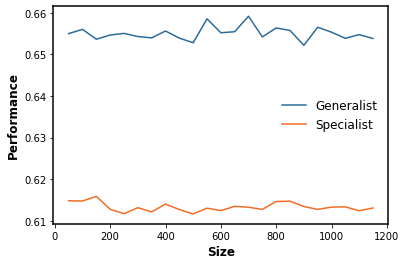

In [4]:
# GS Fitness Given the Same K and Varying Agent Numbers
given_K_index = 5
g_fitness_across_size, s_fitness_across_size = [], []
for g_fitness, s_fitness in zip(g_fitness_across_K_size, s_fitness_across_K_size):
    g_fitness_across_size.append(g_fitness[given_K_index])
    s_fitness_across_size.append(s_fitness[given_K_index])

x = agent_num_list
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, g_fitness_across_size, "-", label="Generalist", color=nature_blue)
plt.plot(x, s_fitness_across_size, "-", label="Specialist", color=nature_orange)

plt.xlabel('Size', fontweight='bold', fontsize=12)
plt.ylabel('Performance', fontweight='bold', fontsize=12)
# plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(data_folder + r"\GS_performance.png", transparent=True, dpi=300)
plt.show()

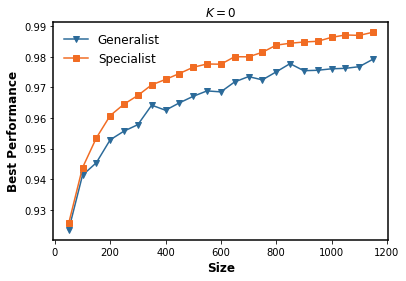

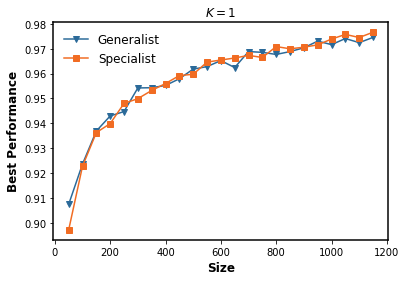

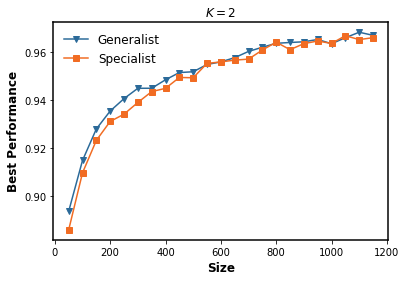

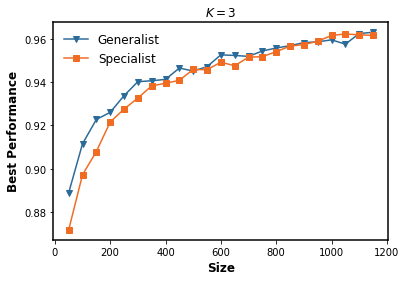

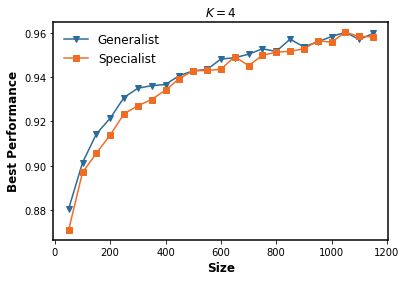

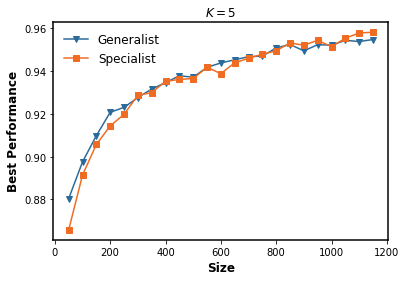

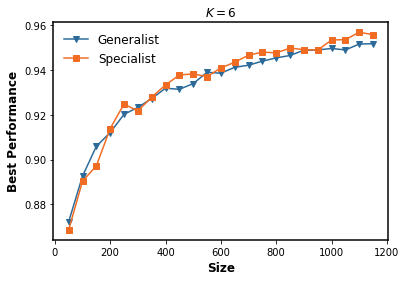

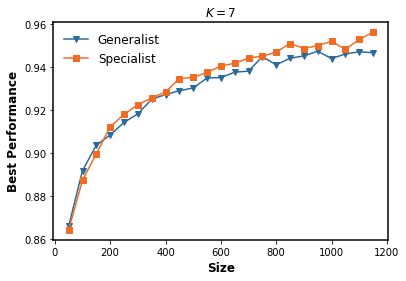

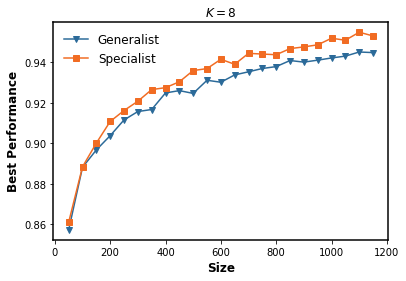

In [5]:
# GS Best Fitness Given the Same K and Varying Agent Numbers
for index in range(9):
    g_fitness_across_size, s_fitness_across_size = [], []
    for g_fitness, s_fitness in zip(g_best_fitness_across_K_size, s_best_fitness_across_K_size):
        g_fitness_across_size.append(g_fitness[index])
        s_fitness_across_size.append(s_fitness[index])
    
    x = agent_num_list
    fig, ax = plt.subplots()
    ax.spines["left"].set_linewidth(1.5)
    ax.spines["right"].set_linewidth(1.5)
    ax.spines["top"].set_linewidth(1.5)
    ax.spines["bottom"].set_linewidth(1.5)
    plt.plot(x, g_fitness_across_size, "v-", label="Generalist", color=nature_blue)
    plt.plot(x, s_fitness_across_size, "s-", label="Specialist", color=nature_orange)
    
    plt.xlabel('Size', fontweight='bold', fontsize=12)
    plt.ylabel('Best Performance', fontweight='bold', fontsize=12)
    # plt.xticks(x)
    plt.title("$K={0}$".format(index))
    plt.legend(frameon=False, ncol=1, fontsize=12)
    plt.savefig(data_folder + r"\GS_best_performance_K_{0}.png".format(index), transparent=True, dpi=300)
    plt.show()

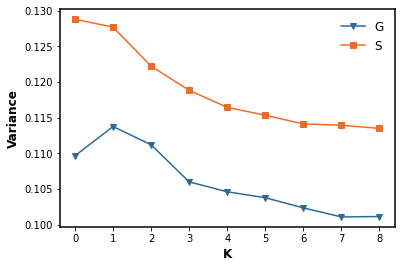

In [6]:
# GST Variance
given_K_index = 3
x = range(len(g_variance))
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, g_variance, "v-", label="G", color=nature_blue)
plt.plot(x, s_variance, "s-", label="S", color=nature_orange)
# plt.plot(x, t_variance, "k-", label="T", color=nature_orange)

plt.xlabel('K', fontweight='bold', fontsize=12)
plt.ylabel('Variance', fontweight='bold', fontsize=12)
plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=12)
plt.savefig(data_folder + r"\GST_variance.png", transparent=True, dpi=300)
plt.show()
# plt.clf()

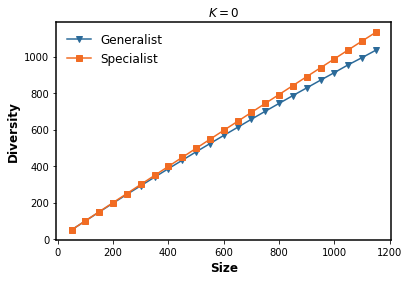

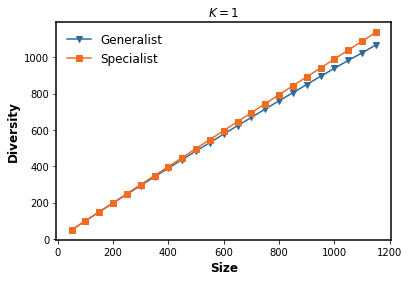

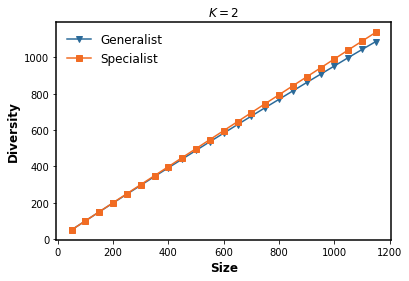

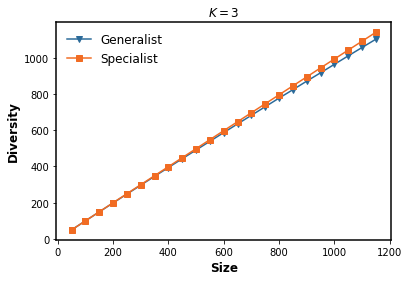

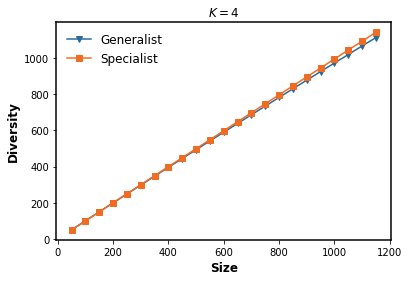

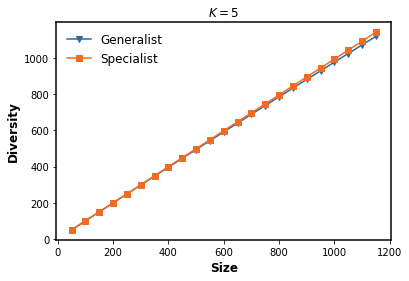

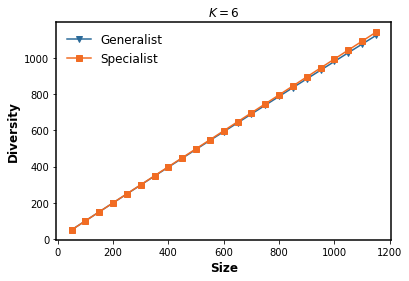

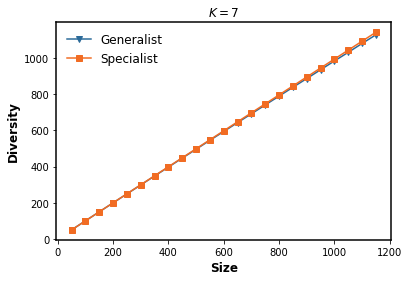

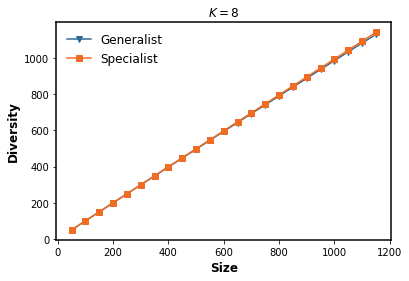

In [7]:
# GS Diversity Given the Same K and Varying Agent Numbers
for index in range(9):
    g_diversity_across_size, s_diversity_across_size = [], []
    for g_diversity, s_diversity in zip(g_unique_diversity_across_K_size, s_unique_diversity_across_K_size):
        g_diversity_across_size.append(g_diversity[index])
        s_diversity_across_size.append(s_diversity[index])
    x = agent_num_list
    fig, ax = plt.subplots()
    ax.spines["left"].set_linewidth(1.5)
    ax.spines["right"].set_linewidth(1.5)
    ax.spines["top"].set_linewidth(1.5)
    ax.spines["bottom"].set_linewidth(1.5)
    plt.plot(x, g_diversity_across_size, "v-", label="Generalist", color=nature_blue)
    plt.plot(x, s_diversity_across_size, "s-", label="Specialist", color=nature_orange)
    
    plt.xlabel('Size', fontweight='bold', fontsize=12)
    plt.ylabel('Diversity', fontweight='bold', fontsize=12)
    # plt.xticks(x)
    plt.title("$K={0}$".format(index))
    plt.legend(frameon=False, ncol=1, fontsize=12)
    plt.savefig(data_folder + r"\GS_unique_diversity_K_{0}.png".format(index), transparent=True, dpi=300)
    plt.show()

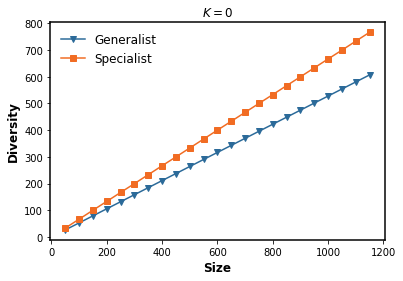

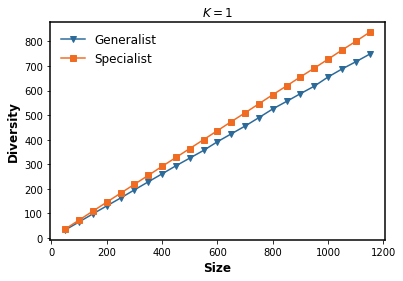

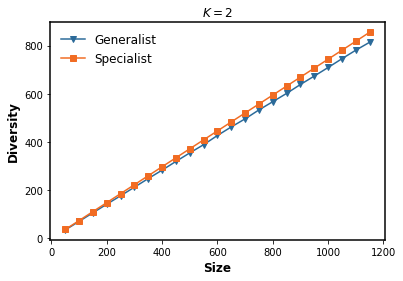

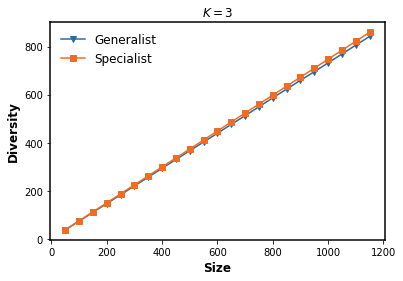

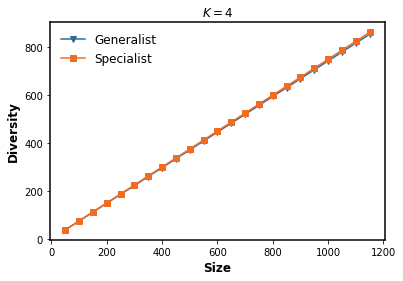

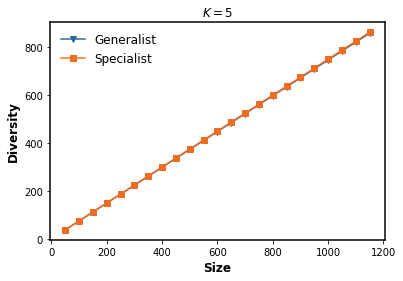

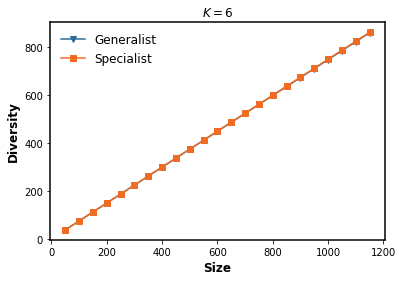

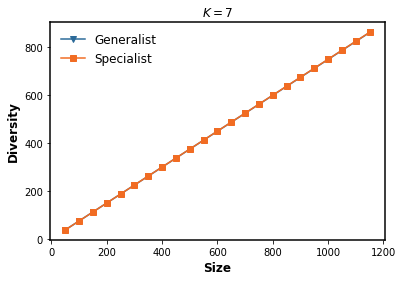

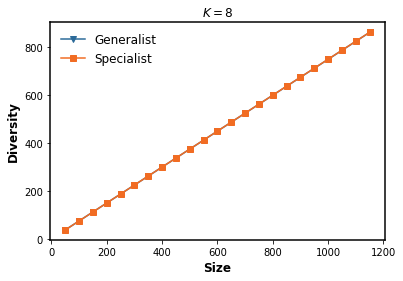

In [8]:
# Pair Wise Diversity Given the Same K and Varying Agent Numbers
for index in range(9):
    g_diversity_across_size, s_diversity_across_size = [], []
    for g_diversity, s_diversity in zip(g_pair_wise_diversity_across_K_size, s_pair_wise_diversity_across_K_size):
        g_diversity_across_size.append(g_diversity[index])
        s_diversity_across_size.append(s_diversity[index])
    x = agent_num_list
    g_diversity_across_size = [a * b for a, b in zip(agent_num_list, g_diversity_across_size)]
    s_diversity_across_size = [a * b for a, b in zip(agent_num_list, s_diversity_across_size)]
    fig, ax = plt.subplots()
    ax.spines["left"].set_linewidth(1.5)
    ax.spines["right"].set_linewidth(1.5)
    ax.spines["top"].set_linewidth(1.5)
    ax.spines["bottom"].set_linewidth(1.5)
    plt.plot(x, g_diversity_across_size, "v-", label="Generalist", color=nature_blue)
    plt.plot(x, s_diversity_across_size, "s-", label="Specialist", color=nature_orange)
    
    plt.xlabel('Size', fontweight='bold', fontsize=12)
    plt.ylabel('Diversity', fontweight='bold', fontsize=12)
    # plt.xticks(x)
    plt.title("$K={0}$".format(index))
    plt.legend(frameon=False, ncol=1, fontsize=12)
    plt.savefig(data_folder + r"\GS_pair_wise_diversity_K_{0}.png".format(index), transparent=True, dpi=300)
    plt.show()

[37.7475, 58.6025, 70.25, 76.295, 79.8275, 81.65, 82.6475, 83.245, 83.6225, 83.7825, 83.9, 83.945, 83.9625, 83.9775, 83.9875, 83.9975, 83.995, 83.995, 84.0, 84.0, 83.9975, 84.0, 84.0]


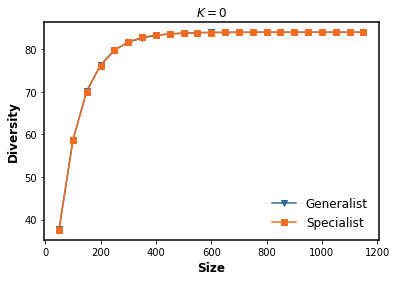

[44.3375, 78.69, 107.225, 128.9075, 146.17, 161.3675, 173.9575, 185.5975, 196.04, 203.25, 207.315, 217.99, 221.945, 226.72, 233.2725, 245.0325, 240.7325, 242.02, 238.7525, 254.4625, 254.465, 248.7175, 248.08]


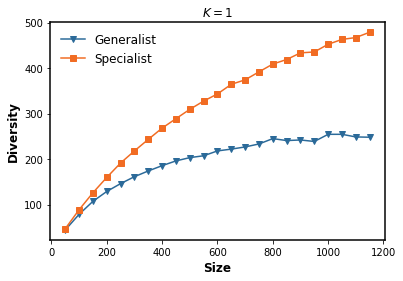

[46.815, 88.1525, 124.7875, 158.5025, 185.9475, 212.0525, 237.515, 258.115, 279.785, 297.015, 311.315, 333.6375, 348.695, 357.7525, 370.9775, 375.685, 387.4125, 403.16, 409.98, 417.675, 427.5, 435.3625, 435.2575]


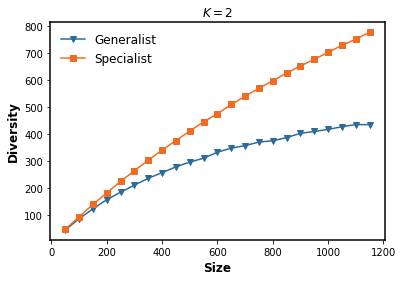

[48.115, 92.8275, 133.8425, 172.82, 208.62, 242.8825, 275.055, 304.9875, 332.885, 358.545, 383.3225, 407.9725, 431.6675, 450.8725, 471.855, 494.7575, 510.4525, 526.14, 537.8725, 560.6825, 576.2125, 588.0175, 601.97]


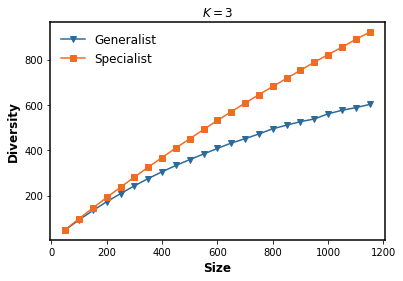

[48.715, 95.1775, 139.1975, 181.62, 221.0325, 260.13, 297.1875, 332.0625, 365.73, 398.355, 429.33, 459.33, 488.955, 515.765, 540.585, 566.105, 591.0075, 614.3275, 640.3975, 660.115, 679.77, 701.5125, 722.7]


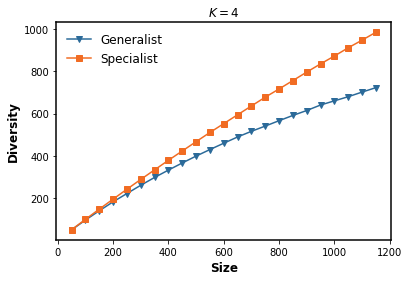

[49.1425, 96.505, 142.2875, 186.7675, 229.205, 270.8775, 310.5, 349.355, 386.5375, 422.1775, 458.2325, 491.4725, 525.5475, 557.945, 588.57, 618.0075, 647.78, 676.36, 704.065, 731.1625, 757.08, 783.52, 808.5625]


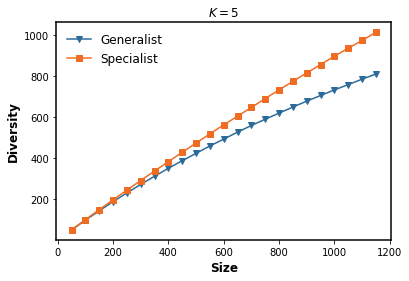

[49.345, 97.265, 143.9525, 189.695, 233.8425, 277.06, 318.8475, 359.7825, 399.58, 438.5975, 476.0875, 512.6475, 548.7025, 584.3525, 619.3875, 653.1725, 685.06, 717.19, 747.725, 778.5125, 810.665, 837.8, 866.6825]


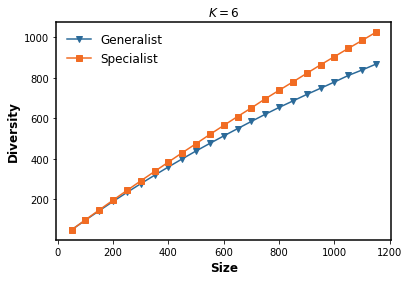

[49.4825, 97.8375, 145.1025, 191.32, 236.71, 281.2225, 324.2875, 366.7075, 407.8275, 448.275, 488.8175, 527.4575, 566.18, 603.02, 640.255, 675.4075, 712.1375, 745.27, 780.4, 813.505, 845.0575, 876.815, 908.43]


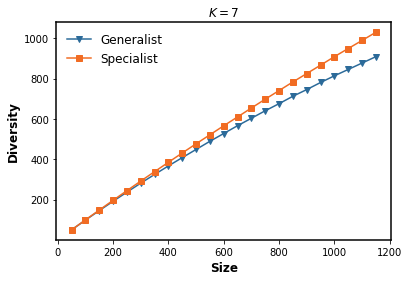

[49.57, 97.945, 145.83, 192.6475, 238.595, 283.665, 328.13, 371.3825, 413.655, 455.8125, 496.52, 536.4675, 576.875, 615.355, 653.485, 691.0325, 728.42, 764.32, 799.965, 836.565, 870.2425, 903.0125, 937.075]


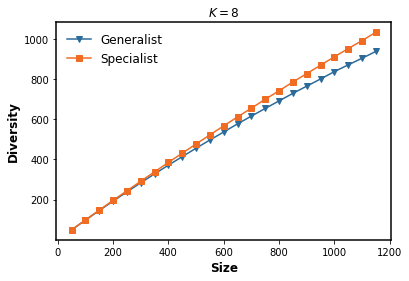

In [9]:
# Partial Unique Diversity Given the Same K and Varying Agent Numbers
for index in range(9):
    g_diversity_across_size, s_diversity_across_size = [], []
    for g_diversity, s_diversity in zip(g_partial_unique_across_K_size, s_partial_unique_across_K_size):
        g_diversity_across_size.append(g_diversity[index])
        s_diversity_across_size.append(s_diversity[index])
    x = agent_num_list
    print(g_diversity_across_size)
    # g_diversity_across_size = [b / a for a, b in zip(agent_num_list, g_diversity_across_size)]
    # s_diversity_across_size = [b / a for a, b in zip(agent_num_list, s_diversity_across_size)]
    fig, ax = plt.subplots()
    ax.spines["left"].set_linewidth(1.5)
    ax.spines["right"].set_linewidth(1.5)
    ax.spines["top"].set_linewidth(1.5)
    ax.spines["bottom"].set_linewidth(1.5)
    plt.plot(x, g_diversity_across_size, "v-", label="Generalist", color=nature_blue)
    plt.plot(x, s_diversity_across_size, "s-", label="Specialist", color=nature_orange)
    
    plt.xlabel('Size', fontweight='bold', fontsize=12)
    plt.ylabel('Diversity', fontweight='bold', fontsize=12)
    # plt.xticks(x)
    plt.title("$K={0}$".format(index))
    plt.legend(frameon=False, ncol=1, fontsize=12)
    plt.savefig(data_folder + r"\GS_partial_unique_diversity_K_{0}.png".format(index), transparent=True, dpi=300)
    plt.show()

In [28]:
def get_unique_diversity(belief_pool: list):
    unique_solutions = []
    for belief in belief_pool:
        string_belief = "".join(belief)
        unique_solutions.append(string_belief)
    unique_solutions = set(unique_solutions)
    print(unique_solutions)
    return len(unique_solutions)

solution_list = [["0", "1", "2", "3"], ["0", "1", "2", "3"], ["0", "1", "2", "3"], ["0", "1", "2", "2"]]
uniqueness = get_unique_diversity(belief_pool=solution_list)
print(uniqueness)

{'0123', '0122'}
2
